In [7]:
import ccxt
import schedule
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
exchange = ccxt.kraken()
bars = exchange.fetch_ohlcv('BTC/AUD', limit=720)

In [6]:
df = pd.DataFrame(bars, columns=['timestamp','open', ' high', 'low', 'close', 'volume'])
df

,timestamp,open,high,low,close,volume
0,1682221320000,41464.7,41464.7,41464.7,41464.7,0.0
1,1682221380000,41464.7,41464.7,41464.7,41464.7,0.0
2,1682221440000,41464.7,41464.7,41464.7,41464.7,0.0
3,1682221500000,41464.7,41464.7,41464.7,41464.7,0.0
4,1682221560000,41464.7,41464.7,41464.7,41464.7,0.0
...,...,...,...,...,...,...
715,1682264220000,41207.2,41207.2,41207.2,41207.2,0.0
716,1682264280000,41207.2,41207.2,41207.2,41207.2,0.0
717,1682264340000,41207.2,41207.2,41207.2,41207.2,0.0
718,1682264400000,41207.2,41207.2,41207.2,41207.2,0.0


In [8]:
from ta.volatility import BollingerBands

bb_indicator = BollingerBands(df['close'])
df['upper_band'] = bb_indicator.bollinger_hband()
df['lower_band'] = bb_indicator.bollinger_lband()
df['moving_average'] = bb_indicator.bollinger_mavg()
df

,timestamp,open,high,low,close,volume,upper_band,lower_band,moving_average
0,1682221320000,41464.7,41464.7,41464.7,41464.7,0.0,NaN,NaN,NaN
1,1682221380000,41464.7,41464.7,41464.7,41464.7,0.0,NaN,NaN,NaN
2,1682221440000,41464.7,41464.7,41464.7,41464.7,0.0,NaN,NaN,NaN
3,1682221500000,41464.7,41464.7,41464.7,41464.7,0.0,NaN,NaN,NaN
4,1682221560000,41464.7,41464.7,41464.7,41464.7,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
715,1682264220000,41207.2,41207.2,41207.2,41207.2,0.0,41253.333534,41076.106466,41164.72
716,1682264280000,41207.2,41207.2,41207.2,41207.2,0.0,41214.581628,41103.318372,41158.95
717,1682264340000,41207.2,41207.2,41207.2,41207.2,0.0,41217.803700,41110.236300,41164.02
718,1682264400000,41207.2,41207.2,41207.2,41207.2,0.0,41218.938326,41119.241674,41169.09


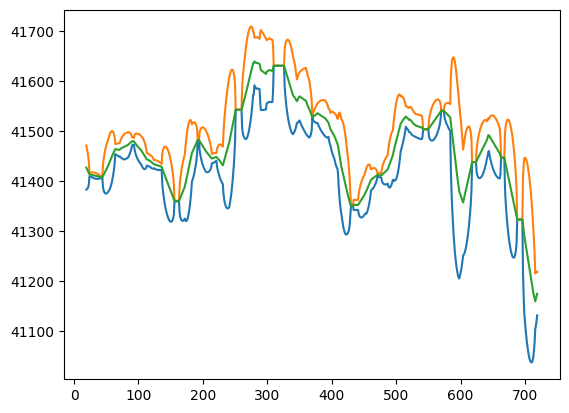

In [23]:
plt.plot(df.index, df['lower_band'])
plt.plot(df.index, df['upper_band'])
plt.plot(df.index, df['moving_average'])